In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter

In [2]:
pd.set_option('display.max_colwidth', 1)

In [3]:
pd.set_option('display.max_colwidth', 1)

In [4]:
dis_sym_data = pd.read_csv("Original_Dataset.csv")

In [5]:
dis_sym_data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dis_sym_data


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dis_sym_data.shape





(4920, 150)

In [10]:
columns_to_check = []
for col in dis_sym_data.columns:
    if col != 'Disease':
        columns_to_check.append(col)

In [10]:
dis_sym_data

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
symptoms = dis_sym_data.iloc[:, 1:].values.flatten()
symptoms = list(set(symptoms))

In [12]:
for symptom in symptoms:
    dis_sym_data[symptom] = dis_sym_data.iloc[:, 1:].apply(lambda row: int(symptom in row.values), axis=1)

dis_sym_data_v1 = dis_sym_data.drop(columns=columns_to_check)

In [13]:
dis_sym_data_v1 = dis_sym_data_v1.loc[:, dis_sym_data_v1.columns.notna()]

In [14]:
dis_sym_data_v1.shape

(4920, 3)

In [15]:
dis_sym_data_v1.columns = dis_sym_data_v1.columns.str.strip()

In [16]:
dis_sym_data_v1.columns

Index(['Disease', nan, nan], dtype='object')

In [17]:
var_mod = ['Disease']
le = LabelEncoder()
for i in var_mod:
    dis_sym_data_v1[i] = le.fit_transform(dis_sym_data_v1[i])

In [18]:
X = dis_sym_data_v1.drop(columns="Disease")
y = dis_sym_data_v1['Disease']

In [19]:
def class_algo(model,independent,dependent):
    model.fit(independent,dependent)
    pred = model.predict(independent)
    accuracy = metrics.accuracy_score(pred,dependent)
    print(MedNexa,'Accuracy : %s' % '{0:.3%}'.format(accuracy))

In [20]:
algorithms = {'Logistic Regression': 
              {"model": LogisticRegression()},
              
              'Decision Tree': 
              {"model": tree.DecisionTreeClassifier()},
              
              'Random Forest': 
              {"model": RandomForestClassifier()},
              
              'SVM':
              {"model": svm.SVC(probability=True)},
              
              'NaiveBayes' :
              {"model": GaussianNB()},
              
              'K-Nearest Neighbors' :
              {"model": KNeighborsClassifier()},
             }

In [21]:
for MedNexa, values in algorithms.items():
    class_algo(values["model"],X,y)

Logistic Regression Accuracy : 2.439%
Decision Tree Accuracy : 2.439%
Random Forest Accuracy : 2.439%
SVM Accuracy : 2.439%
NaiveBayes Accuracy : 2.439%
K-Nearest Neighbors Accuracy : 2.439%


In [22]:
doc_data = pd.read_csv("Doctor_Versus_Disease.csv",encoding='latin1', names=['Disease','Specialist'])


In [21]:
doc_data.tail(5)

,Disease,Specialist
36,Bronchial Asthma,Pulmonologist
37,Pneumonia,Pulmonologist
38,Osteoarthristis,Rheumatologists
39,Arthritis,Rheumatologists
40,Tuberculosis,Tuberculosis


In [22]:
doc_data.shape

(41, 2)

In [23]:
doc_data


,Disease,Specialist
0,Drug Reaction,Allergist
1,Allergy,Allergist
2,Hypertension,Cardiologist
3,Heart attack,Cardiologist
4,Psoriasis,Dermatologist
5,Chicken pox,Dermatologist
6,Acne,Dermatologist
7,Impetigo,Dermatologist
8,Fungal infection,Dermatologist
9,Hypothyroidism,Endocrinologist


In [24]:
doc_data['Specialist'] = np.where((doc_data['Disease'] == 'Tuberculosis'),'Pulmonologist', doc_data['Specialist'])

In [25]:
doc_data.tail(5)

,Disease,Specialist
36,Bronchial Asthma,Pulmonologist
37,Pneumonia,Pulmonologist
38,Osteoarthristis,Rheumatologists
39,Arthritis,Rheumatologists
40,Tuberculosis,Pulmonologist


In [26]:
des_data = pd.read_csv("Disease_Description.csv")

In [27]:
des_data.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury caused by taking medication. ADRs may occur following a single dose or prolonged administration of a drug or result from the combination of two or more drugs.
1,Malaria,An infectious disease caused by protozoan parasites from the Plasmodium family that can be transmitted by the bite of the Anopheles mosquito or by a contaminated needle or transfusion. Falciparum malaria is the most deadly type.
2,Allergy,"An allergy is an immune system response to a foreign substance that's not typically harmful to your body.They can include certain foods, pollen, or pet dander. Your immune system's job is to keep you healthy by fighting harmful pathogens."
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroid or low thyroid, is a disorder of the endocrine system in which the thyroid gland does not produce enough thyroid hormone."
4,Psoriasis,"Psoriasis is a common skin disorder that forms thick, red, bumpy patches covered with silvery scales. They can pop up anywhere, but most appear on the scalp, elbows, knees, and lower back. Psoriasis can't be passed from person to person. It does sometimes happen in members of the same family."


In [28]:
des_data.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury caused by taking medication. ADRs may occur following a single dose or prolonged administration of a drug or result from the combination of two or more drugs.
1,Malaria,An infectious disease caused by protozoan parasites from the Plasmodium family that can be transmitted by the bite of the Anopheles mosquito or by a contaminated needle or transfusion. Falciparum malaria is the most deadly type.
2,Allergy,"An allergy is an immune system response to a foreign substance that's not typically harmful to your body.They can include certain foods, pollen, or pet dander. Your immune system's job is to keep you healthy by fighting harmful pathogens."
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroid or low thyroid, is a disorder of the endocrine system in which the thyroid gland does not produce enough thyroid hormone."
4,Psoriasis,"Psoriasis is a common skin disorder that forms thick, red, bumpy patches covered with silvery scales. They can pop up anywhere, but most appear on the scalp, elbows, knees, and lower back. Psoriasis can't be passed from person to person. It does sometimes happen in members of the same family."


In [40]:
test_col = []
for col in dis_sym_data_v1.columns:
    if col != 'Disease':
        test_col.append(col)


test_data = {}
symptoms = []
predicted = []
def test_input():
    symptoms.clear()
    predicted.clear()
    num_inputs = int(input("Enter the number of symptoms you have: "))
    for i in range(num_inputs):
        user_input = input("Enter Symptoms #{}: ".format(i+1))
        symptoms.append(user_input)
    print("Symptoms you have:", symptoms)
    for column in test_col:
        test_data[column] = 1 if column in symptoms else 0
        test_df = pd.DataFrame(test_data, index=[0])
    print("Predicting Disease based on 6 ML algorithms...")
    for MedNexa, values in algorithms.items():
        predict_disease = values["model"].predict(test_df)
        predict_disease = le.inverse_transform(predict_disease)
        predicted.extend(predict_disease)
    disease_counts = Counter(predicted)
    percentage_per_disease = {disease: (count / 6) * 100 for disease, count in disease_counts.items()}
    result_df = pd.DataFrame({"Disease": list(percentage_per_disease.keys()),
                               "Chances": list(percentage_per_disease.values())})
    result_df = result_df.merge(doc_data, on='Disease', how='left')
    result_df = result_df.merge(des_data, on='Disease', how='left')
    return result_df

In [41]:
test_input()

Enter the number of symptoms you have: 1
Enter Symptoms #1: headache
Symptoms you have: ['headache']
Predicting Disease based on 6 ML algorithms...


,Disease,Chances,Specialist,Description
0,Paralysis (brain hemorrhage),83.333333,Neurologist,"Intracerebral hemorrhage (ICH) is when blood suddenly bursts into brain tissue, causing damage to your brain. Symptoms usually appear suddenly during ICH. They include headache, weakness, confusion, and paralysis, particularly on one side of your body."
1,AIDS,16.666667,Osteopathic,"Acquired immunodeficiency syndrome (AIDS) is a chronic, potentially life-threatening condition caused by the human immunodeficiency virus (HIV). By damaging your immune system, HIV interferes with your body's ability to fight infection and disease."


In [42]:
import pickle
with open('MedNexa.pkl','wb') as files:
    pickle.dump(MedNexa,files)

In [125]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")


In [126]:
# Load dataset
dis_sym_data = pd.read_csv("Original_Dataset.csv")

In [127]:
# Process the dataset
columns_to_check = [col for col in dis_sym_data.columns if col != 'Disease']
symptoms = list(set(dis_sym_data.iloc[:, 1:].values.flatten()))

for symptom in symptoms:
    dis_sym_data[symptom] = dis_sym_data.iloc[:, 1:].apply(lambda row: int(symptom in row.values), axis=1)

dis_sym_data_v1 = dis_sym_data.drop(columns=columns_to_check)
dis_sym_data_v1 = dis_sym_data_v1.loc[:, dis_sym_data_v1.columns.notna()]
dis_sym_data_v1.columns = dis_sym_data_v1.columns.str.strip()

In [128]:

# Encode target variable
le = LabelEncoder()
dis_sym_data_v1['Disease'] = le.fit_transform(dis_sym_data_v1['Disease'])


In [129]:
# Split into features and target
X = dis_sym_data_v1.drop(columns="Disease")
y = dis_sym_data_v1['Disease']

In [130]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=22)
X_smote, y_smote = smote.fit_resample(X, y)

In [131]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.6, stratify=y_smote, random_state=22)

In [132]:
# Define regularized models with class weight adjustments
algorithms = {
    'Logistic Regression': LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000, class_weight='balanced'),
    'Decision Tree': tree.DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'SVM': svm.SVC(C=1.0, kernel='linear', probability=True, class_weight='balanced'),
    'NaiveBayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


In [133]:
# Function to train and evaluate using cross-validation
def train_and_evaluate_cv(model, X, y, model_name):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=22)
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f'{model_name} Accuracy: {np.mean(cv_scores):.3%} ± {np.std(cv_scores):.3%}')
    return cv_scores


In [134]:
# Train and evaluate each model with cross-validation on the balanced dataset
for MedNexa, model in algorithms.items():
    train_and_evaluate_cv(model, X_smote, y_smote, MedNexa)

Logistic Regression Accuracy: 100.000% ± 0.000%
Decision Tree Accuracy: 100.000% ± 0.000%
Random Forest Accuracy: 100.000% ± 0.000%
SVM Accuracy: 100.000% ± 0.000%
NaiveBayes Accuracy: 100.000% ± 0.000%
K-Nearest Neighbors Accuracy: 100.000% ± 0.000%


In [135]:
# Plot learning curves for models
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    

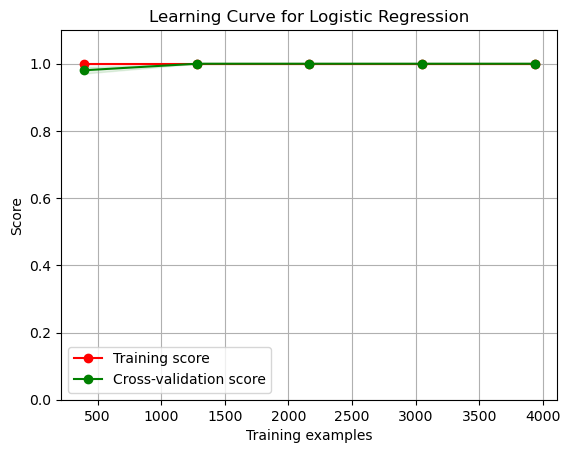

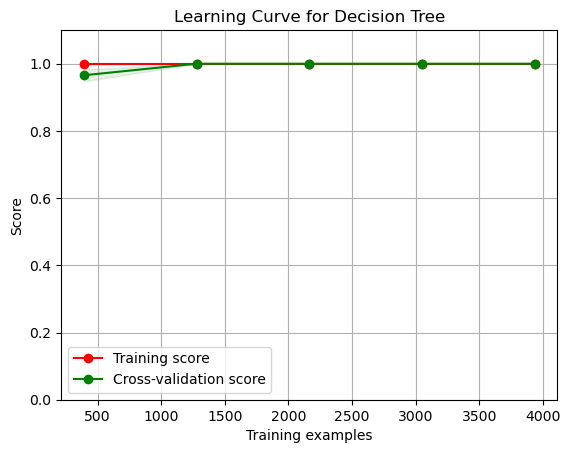

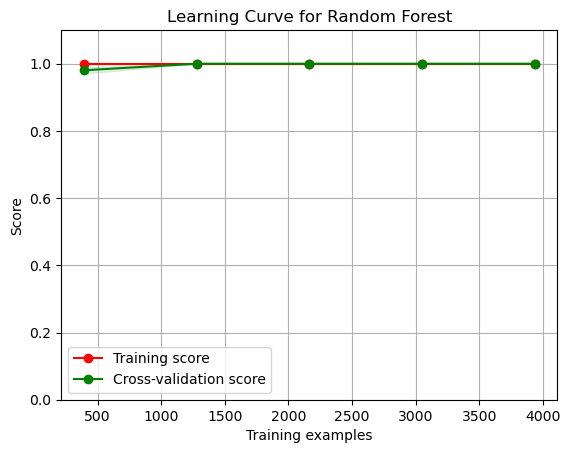

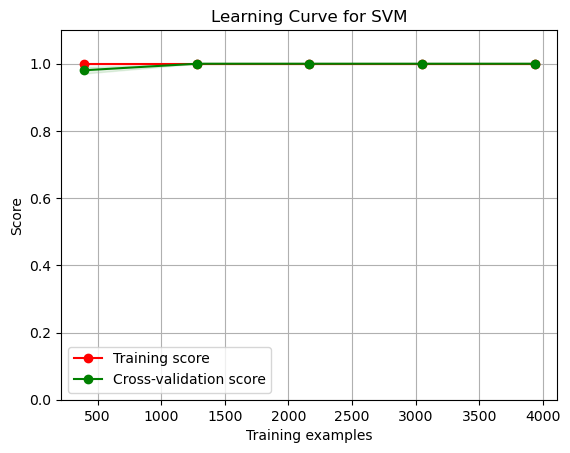

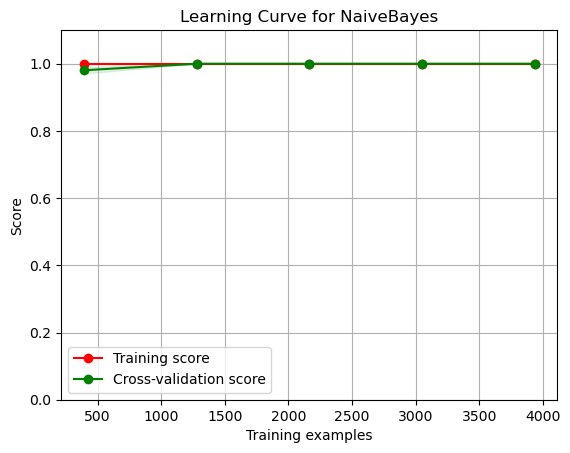

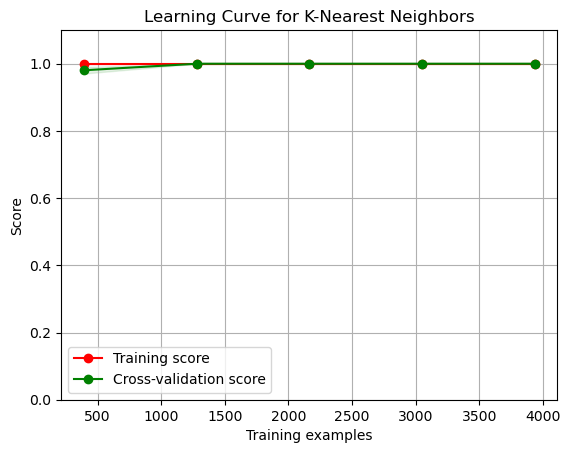

In [136]:
# Plot learning curves for all models
for MedNexa, model in algorithms.items():
    plot_learning_curve(model, X_smote, y_smote, f'Learning Curve for {MedNexa}')

In [137]:
# Plot confusion matrix for each model
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [138]:
# Train models and plot confusion matrices
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, stratify=y_smote, random_state=42)

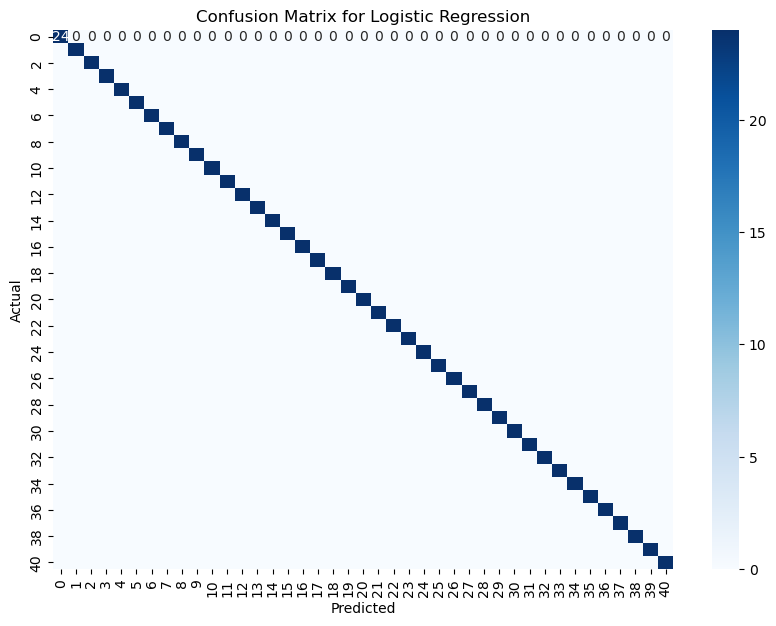

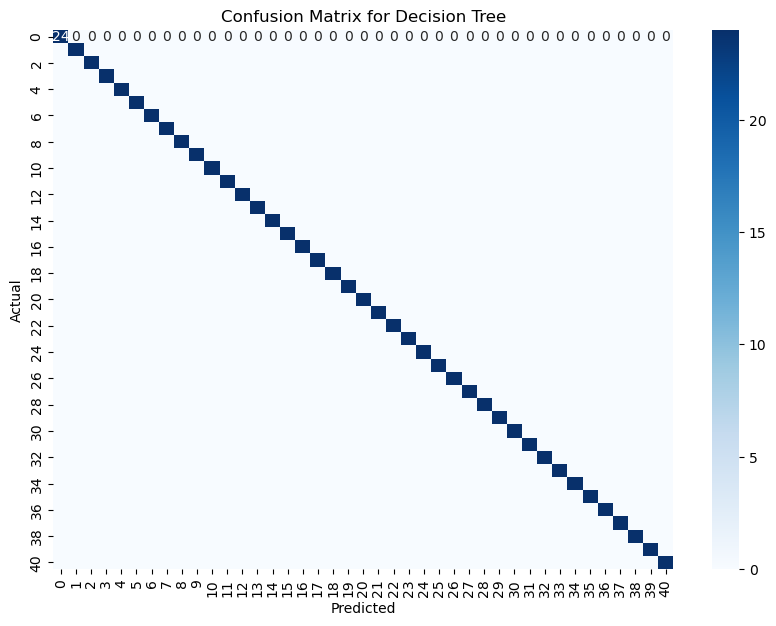

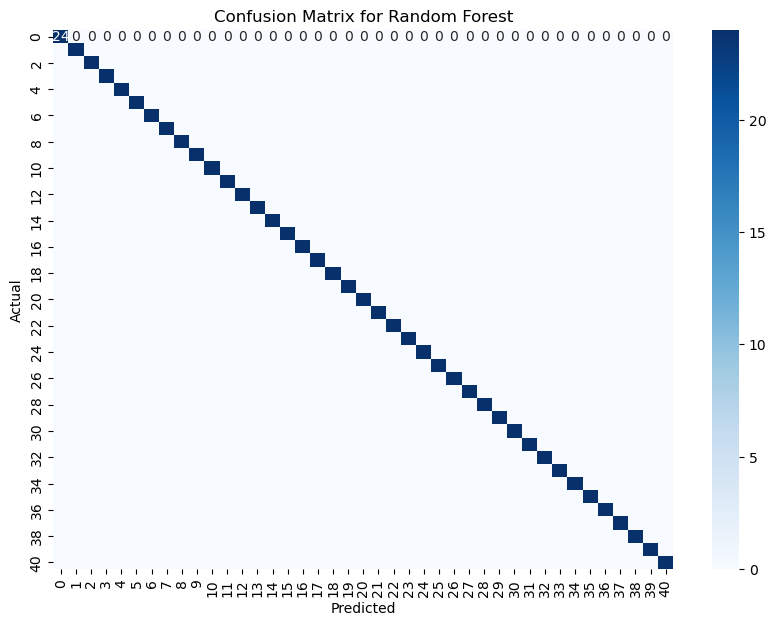

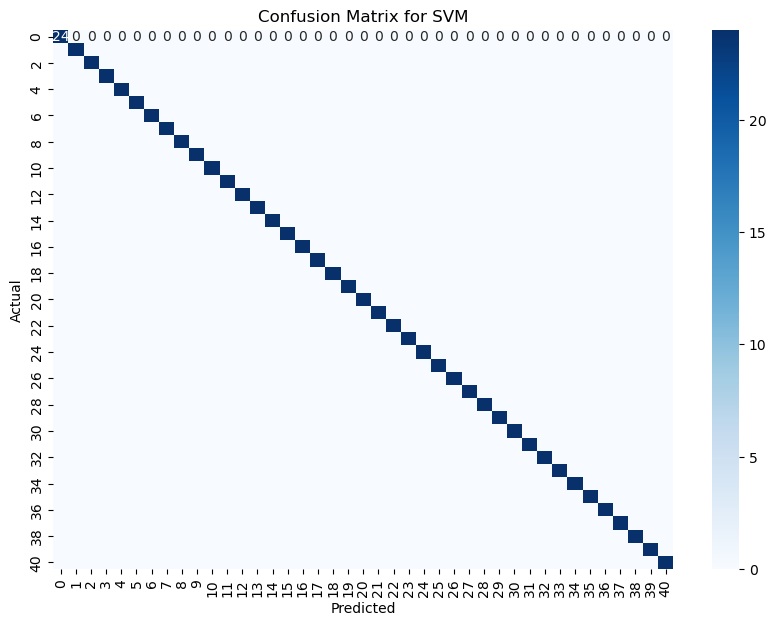

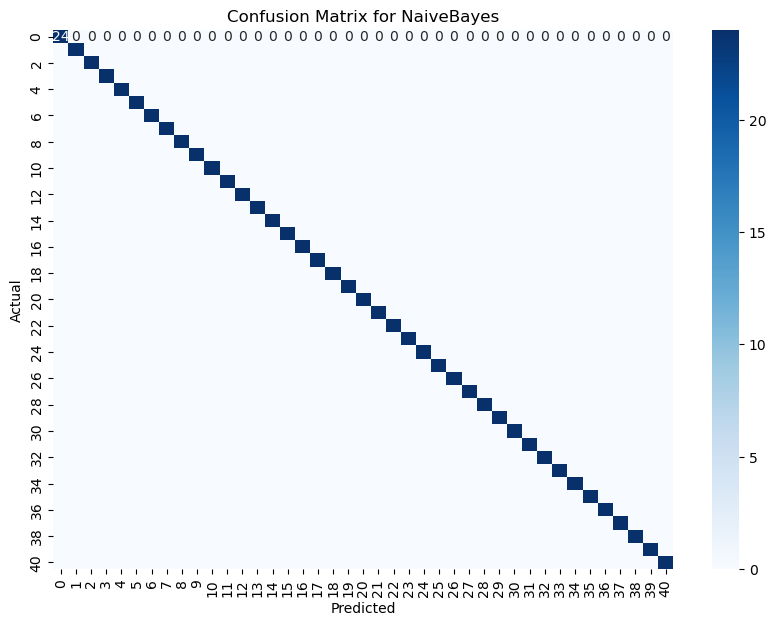

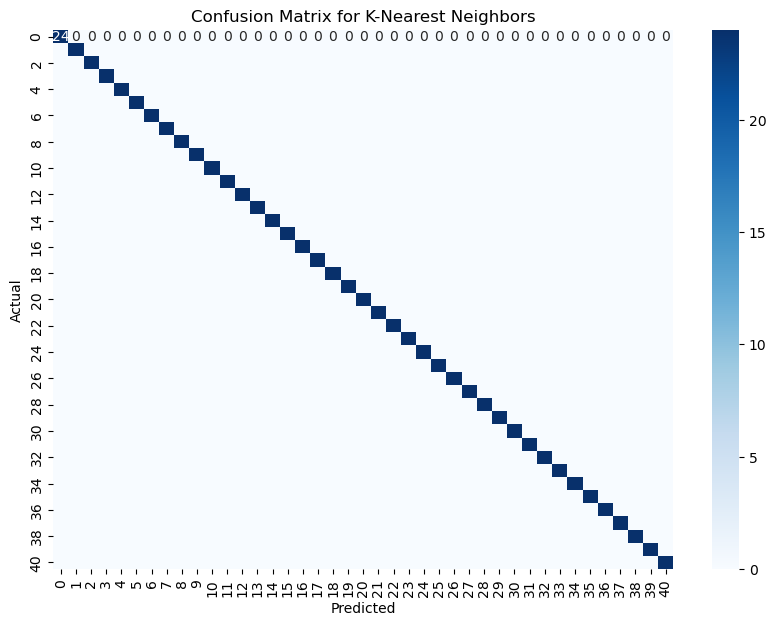

In [139]:
for MedNexa, model in algorithms.items():
    model.fit(X_train, y_train)
    plot_confusion_matrix(model, X_test, y_test, f'Confusion Matrix for {MedNexa}')

In [140]:
# Plot feature importances for tree-based models
def plot_feature_importances(model, X, title):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10, 7))
        plt.title(title)
        plt.bar(range(X.shape[1]), importances[indices], align='center')
        plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.show()

In [141]:
# Plot ROC curves for each model
def plot_roc_curve(model, X_test, y_test, title):
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

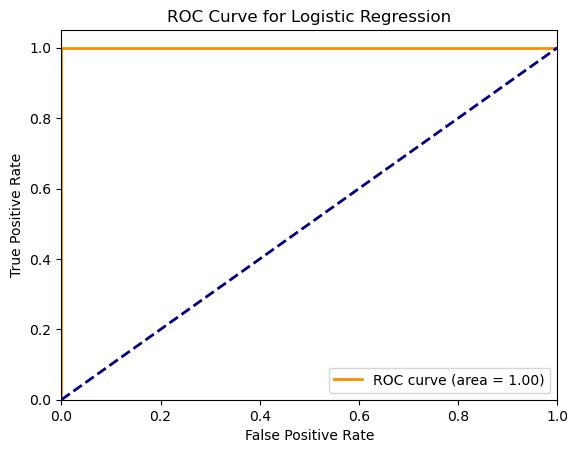

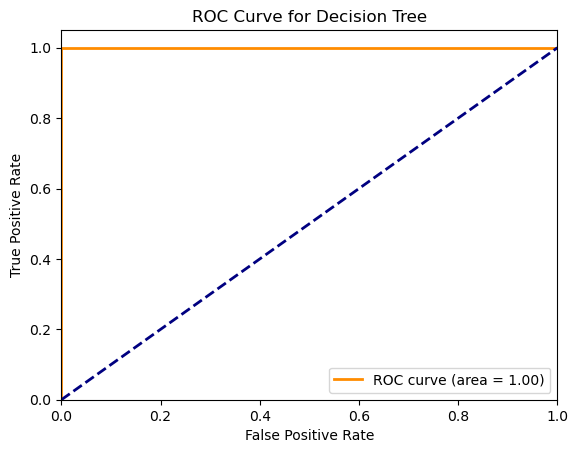

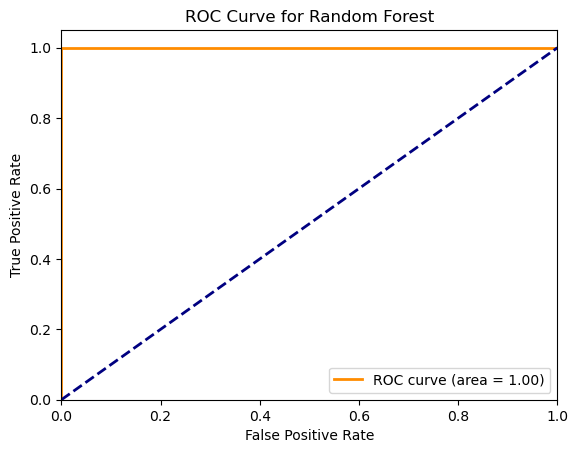

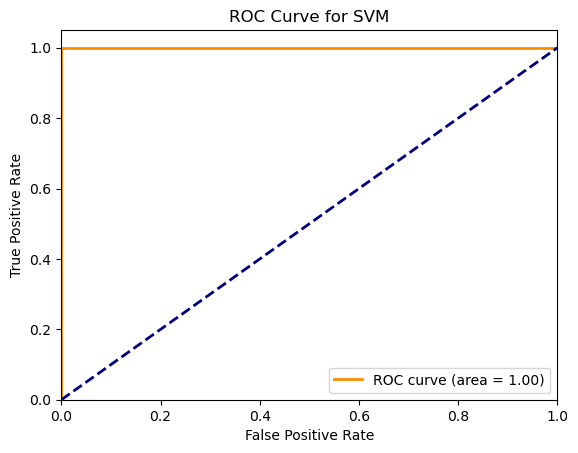

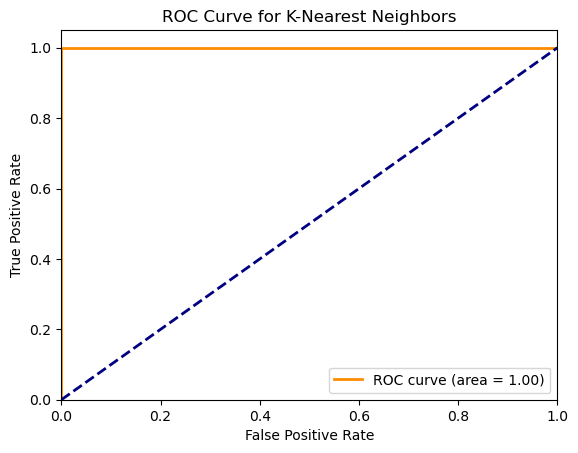

In [142]:
# Plot ROC curves for all models
for MedNexa, model in algorithms.items():
    if MedNexa != 'NaiveBayes':  # NaiveBayes has no predict_proba in this context
        plot_roc_curve(model, X_test, y_test, f'ROC Curve for {MedNexa}')

In [143]:

# Plot Precision-Recall curves for each model
def plot_precision_recall_curve(model, X_test, y_test, title):
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=1)

    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.show()

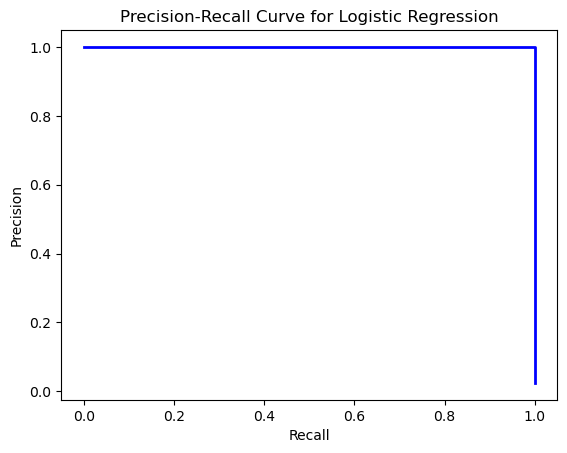

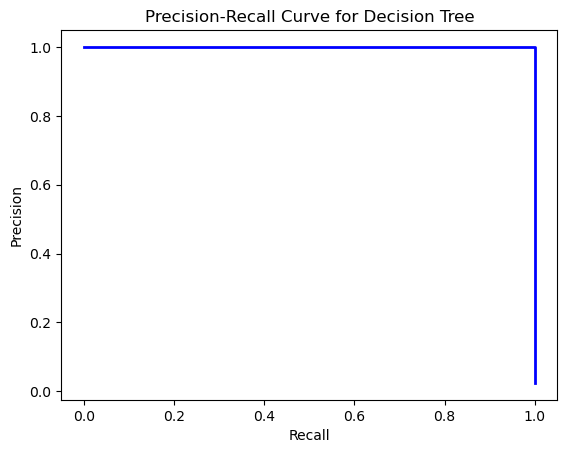

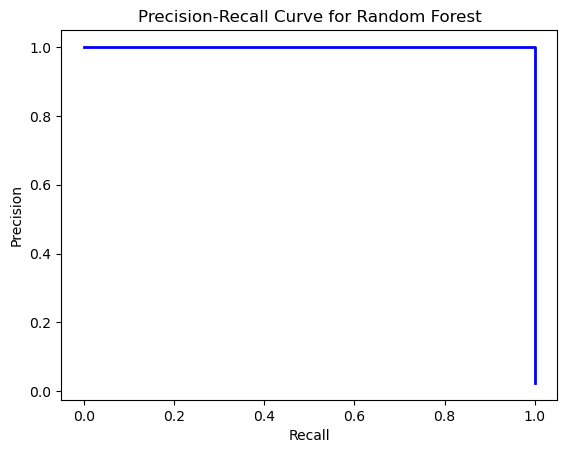

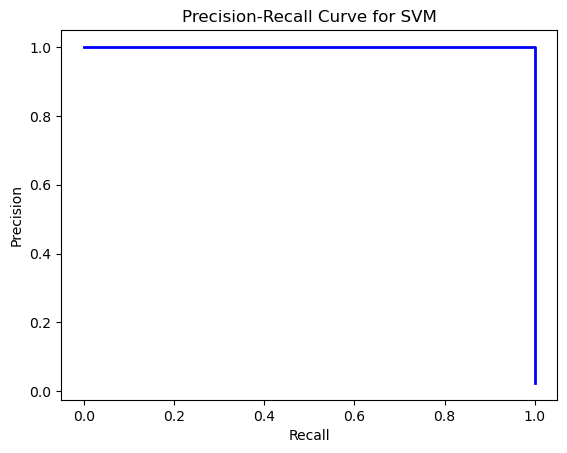

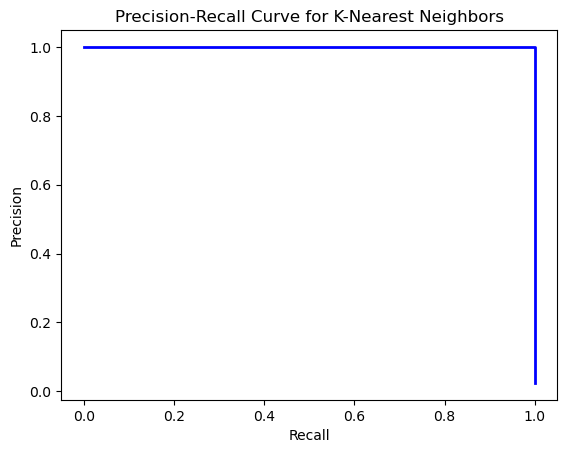

In [144]:
# Plot Precision-Recall curves for all models
for MedNexa, model in algorithms.items():
    if MedNexa != 'NaiveBayes':  # NaiveBayes has no predict_proba in this context
        plot_precision_recall_curve(model, X_test, y_test, f'Precision-Recall Curve for {MedNexa}')

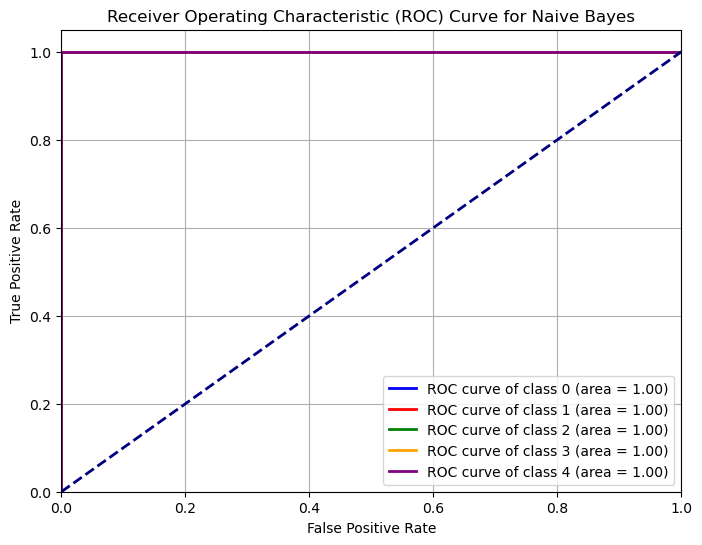

In [145]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming you have already loaded and preprocessed your data
# X should contain the features (symptoms) and y should be the target (Disease)

# Example of Label Encoding if not already done
# le = LabelEncoder()
# y = le.fit_transform(y)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict probabilities for each class (one-vs-rest approach)
y_prob = nb_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

n_classes = len(np.unique(y_train))  # Number of classes
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Define colors for each class if more than 5 classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
